<a href="https://colab.research.google.com/github/Moraw1993/ML_projects/blob/main/Abalone/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest # for detecting outliers
from sklearn.preprocessing import StandardScaler

# About dataset

## Dataset overview

The Abalone dataset focuses on predicting the age of abalone, a marine mollusk, using physical measurements. Traditionally, determining age involves cutting the shell, staining it, and counting the number of rings under a microscope—a tedious and time-consuming process. This dataset simplifies the task by utilizing easily obtainable measurements to estimate age. Additionally, factors such as weather patterns or location, which influence food availability, could also play a role in solving this problem. The dataset has been preprocessed by removing examples with missing values, particularly where the target value was absent, and continuous variables were scaled for use with artificial neural networks by dividing by 200.

## Variables

| Variable Name  	| Role    	| Type        	| Description                 	| Units 	| Missing Values 	|
|----------------	|---------	|-------------	|-----------------------------	|-------	|----------------	|
| Sex            	| Feature 	| Categorical 	| M, F, and I (infant)        	|       	| No             	|
| Length         	| Feature 	| Continuous  	| Longest shell measurement   	| mm    	| No             	|
| Diameter       	| Feature 	| Continuous  	| Perpendicular to length     	| mm    	| No             	|
| Height         	| Feature 	| Continuous  	| With meat in shell          	| mm    	| No             	|
| Whole_weight   	| Feature 	| Continuous  	| Whole abalone               	| grams 	| No             	|
| Shucked_weight 	| Feature 	| Continuous  	| Weight of meat              	| grams 	| No             	|
| Viscera_weight 	| Feature 	| Continuous  	| Gut weight (after bleeding) 	| grams 	| No             	|
| Shell_weight   	| Feature 	| Continuous  	| After being dried           	| grams 	| No             	|
| Rings          	| Target  	| Integer     	| +1.5 gives the age in years 	|       	| No             	|


## Objective

- **Predictive Modeling** - Develop a regression model to predict the age of abalones based on their physical measurements, aiming to replace the traditional and labor-intensive method of age determination

- **Exploratory Data analysis** - Analyze the realtionships betweend physical attributes (e.g. length, weight) and the age of abalones to identify key predictors and gain bological insights.

- **Feature Importance** - Determine which physical attributes contributes most significantly to predicting age, providing valuable insights for researchers in marine biology

## Additional information...

In this project, the target variable is the number of rings, which serves as a proxy for the age of abalones. To calculate the actual age, we will add 1.5 to the predicted number of rings, as each abalone grows approximately one ring per year after an initial 1.5 years of development. This approach ensures the model's predictions align with biological age estimation practices.


**CITE:**

W. Nash, T. Sellers, S. Talbot, A. Cawthorn, and W. Ford. "Abalone," UCI Machine Learning Repository, 1994. [Online].

Available: https://doi.org/10.24432/C55C7W.




# Loading data

In [47]:
path = "https://raw.githubusercontent.com/Moraw1993/ML_projects/29e8743f78684207f12a87d3ee17dc01fcea73bb/Abalone/abalone.csv"
df = pd.read_csv(path, sep = ',')

scaled_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

df[scaled_columns] = df[scaled_columns] * 200

In [48]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7


# Descriptive statistics

## Information about dataset

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Description for `df.info`

1. Dataset summary:
    - In the abalone dataset we have **4177 entries** and 9 columns.
    - All values are non-null, meaning there are no missing values in the dataset.
2. Categorization of columns by data types:
    - Qualitative:
        - Nominal: `Sex`
        - Oridinal: None
    - Quantitative:
        - Interval: None
        - Ratio: `Length`, `Diameter`, `Height`, `Whole weight`, `Shucked weight`, `Viscera weight`, `Shell weight`, `Rings`
3. Data types in columns:
    - 7 numeric columns of type `float64` (continous variables)
    - 1 numeric column of type `int64` (`Rings` - discrete variable)
    - 1 categorical column of type `object` (`Sex`)



## Descriptive statistics (e.q avg, min, max, sum, percentiles)

In [50]:
print("Numerical statistics:")
stats = df.describe()
stats_with_rsd = pd.concat([stats, (stats.loc['std'] / stats.loc['mean'] * 100).rename('RSD (%)').to_frame().T])

stats_with_rsd.transpose().round(4)


Numerical statistics:


,count,mean,std,min,25%,50%,75%,max,RSD (%)
Length,4177.0,104.7984,24.0186,15.0,90.0,109.0,123.0,163.0,22.9188
Diameter,4177.0,81.5763,19.8480,11.0,70.0,85.0,96.0,130.0,24.3306
Height,4177.0,27.9033,8.3654,0.0,23.0,28.0,33.0,226.0,29.9800
Whole weight,4177.0,165.7484,98.0778,0.4,88.3,159.9,230.6,565.1,59.1727
Shucked weight,4177.0,71.8735,44.3926,0.2,37.2,67.2,100.4,297.6,61.7649
Viscera weight,4177.0,36.1187,21.9229,0.1,18.7,34.2,50.6,152.0,60.6966
Shell weight,4177.0,47.7662,27.8405,0.3,26.0,46.8,65.8,201.0,58.2850
Rings,4177.0,9.9337,3.2242,1.0,8.0,9.0,11.0,29.0,32.4569


### Statistical Significance Description for Each Feature

Every feature has `4177` records, indicating there are no missing values in the dataset.

---

**1. Length**
- **Mean**: 104.7984 – Represents the average length of abalones in millimeters (mm).
- **Std (Standard Deviation)**: 24.0186 – Indicates low variability around the mean.
- **Min**: 15.0 – The smallest recorded length, likely a juvenile or anomaly.
- **25th Percentile**: 90.0 – 25% of abalones have lengths less than 90 mm.
- **Median (50th Percentile)**: 109.0 – The middle value of abalone lengths.
- **75th Percentile**: 123.0 – 75% of abalones are shorter than 123 mm.
- **Max**: 163.0 – The largest recorded length.
- **RSD (%):** 22.92 – Indicates low variability in the data.
- **Shape**: The **median is greater than the mean**, suggesting a **left-skewed distribution** with a longer tail on the left.

---

**2. Diameter**
- **Mean**: 81.5763 – The average diameter of abalones in millimeters (mm).
- **Std (Standard Deviation)**: 19.8480 – Moderate variability around the mean.
- **Min**: 11.0 – The smallest diameter, possibly an anomaly or juvenile.
- **25th Percentile**: 70.0 – 25% of abalones have diameters smaller than 70 mm.
- **Median (50th Percentile)**: 85.0 – The central value of abalone diameters.
- **75th Percentile**: 96.0 – 75% of abalones have diameters less than 96 mm.
- **Max**: 130.0 – The largest recorded diameter.
- **RSD (%):** 24.33 – Indicates consistent data with moderate spread.
- **Shape**: The **median is greater than the mean**, suggesting a **left-skewed distribution**, with more smaller values.

---

**3. Height**
- **Mean**: 27.9033 – The average height of abalones in millimeters (mm).
- **Std (Standard Deviation)**: 8.3654 – Indicates moderate variability around the mean.
- **Min**: 0.0 – Indicates a likely measurement error or anomaly.
- **25th Percentile**: 23.0 – 25% of abalones have heights smaller than 23 mm.
- **Median (50th Percentile)**: 28.0 – The typical height of abalones.
- **75th Percentile**: 33.0 – 75% of abalones have heights under 33 mm.
- **Max**: 226.0 – An unusually large height, possibly an outlier.
- **RSD (%):** 29.98 – Reflects moderate variability in the data.
- **Shape**: The **median is approximately equal to the mean**, suggesting a **symmetric distribution**, though extreme outliers may affect its shape.

---

**4. Whole Weight**
- **Mean**: 165.7484 – Average whole weight of abalones in grams (g).
- **Std (Standard Deviation)**: 98.0778 – Indicates high variability in weight.
- **Min**: 0.4 – Anomalously low weight, possibly an anomaly.
- **25th Percentile**: 88.3 – 25% of abalones weigh less than 88.3 g.
- **Median (50th Percentile)**: 159.9 – The typical abalone weight.
- **75th Percentile**: 230.6 – 75% of abalones weigh less than 230.6 g.
- **Max**: 565.1 – The heaviest abalone recorded.
- **RSD (%):** 59.17 – High variability reflecting size diversity.
- **Shape**: The **mean is greater than the median**, indicating a **right-skewed distribution**, with a longer tail on the right.

---

**5. Shucked Weight**
- **Mean**: 71.8735 – Average weight of abalones without shells in grams (g).
- **Std (Standard Deviation)**: 44.3926 – Indicates significant spread around the mean.
- **Min**: 0.2 – Extremely low weight, likely an anomaly.
- **25th Percentile**: 37.2 – 25% of abalones weigh less than 37.2 g when shucked.
- **Median (50th Percentile)**: 67.2 – The typical weight of shucked abalones.
- **75th Percentile**: 100.4 – 75% of abalones weigh less than 100.4 g.
- **Max**: 297.6 – The heaviest shucked abalone.
- **RSD (%):** 61.76 – High variability in shucked weights.
- **Shape**: The **mean is greater than the median**, suggesting a **right-skewed distribution**.

---

**6. Viscera Weight**
- **Mean**: 36.1187 – Average weight of viscera in grams (g).
- **Std (Standard Deviation)**: 21.9229 – Indicates moderate variability in viscera weight.
- **Min**: 0.1 – A potential anomaly or measurement error.
- **25th Percentile**: 18.7 – 25% of abalones have viscera weights below 18.7 g.
- **Median (50th Percentile)**: 34.2 – Typical viscera weight.
- **75th Percentile**: 50.6 – 75% of abalones have viscera weights under 50.6 g.
- **Max**: 152.0 – The heaviest viscera recorded.
- **RSD (%):** 60.70 – Reflects high variability in viscera measurements.
- **Shape**: The **mean is greater than the median**, indicating a **right-skewed distribution**.

---

**7. Shell Weight**
- **Mean**: 47.7662 – Average shell weight in grams (g).
- **Std (Standard Deviation)**: 27.8405 – Indicates considerable spread in shell weights.
- **Min**: 0.3 – Indicates an unusually light shell, possibly an anomaly.
- **25th Percentile**: 26.0 – 25% of abalones have shell weights less than 26 g.
- **Median (50th Percentile)**: 46.8 – The typical shell weight.
- **75th Percentile**: 65.8 – 75% of abalones have shells weighing less than 65.8 g.
- **Max**: 201.0 – The heaviest shell recorded.
- **RSD (%):** 58.29 – Reflects high variability in shell sizes.
- **Shape**: The **mean is greater than the median**, suggesting a **right-skewed distribution**.

---

**8. Rings (Target Variable)**
- **Mean**: 9.9337 – Average number of rings, representing age + 1.5 years.
- **Std (Standard Deviation)**: 3.2242 – Indicates moderate variability in age.
- **Min**: 1.0 – The youngest abalone.
- **25th Percentile**: 8.0 – 25% of abalones have 8 or fewer rings.
- **Median (50th Percentile)**: 9.0 – Typical number of rings (age ~10.5 years).
- **75th Percentile**: 11.0 – 75% of abalones have 11 or fewer rings.
- **Max**: 29.0 – The oldest recorded abalone.
- **RSD (%):** 32.46 – Moderate variability reflecting a wide age range.
- **Shape**: The **mean is greater than the median**, indicating a **right-skewed distribution**.


In [51]:
print('categorical statistics:')

df.describe(include='object').transpose()

categorical statistics:


,count,unique,top,freq
Sex,4177,3,M,1528


### Statistical Significance Description for Categorical Features

Every feature has `4177` records, indicating there are no missing values in the dataset.

---

**1. Sex**
- **Count**: 4177 – Total number of records in the dataset.
- **Unique**: 3 – There are three unique categories: `M` (Male), `F` (Female), and `I` (Infant).
- **Top**: `M` – The most frequent category is `Male`.
- **Frequency (Freq)**: 1528 – The number of records belonging to the `M` (Male) category.
- **Observation**: The distribution is likely uneven, with `M` (Male) being the dominant category, followed by `F` (Female) and `I` (Infant). A bar chart would likely show a significant difference in category frequencies.


## Split dataset to train and test


In [52]:
#Split the data into training and testing sets

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

## Outlier detection

In [53]:
train_data = pd.get_dummies(X_train, columns=['Sex'], drop_first=False, dtype='int')

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

isolation_forest = IsolationForest(contamination=0.03, random_state=42, n_estimators=200, max_samples=0.9)
train_data['anomaly'] = isolation_forest.fit_predict(train_data[numeric_columns])

train_data['anomaly'] = train_data['anomaly'].map({1: 'inlier', -1: 'outlier'})

train_data_original = train_data.copy()
train_data_original[numeric_columns] = scaler.inverse_transform(train_data_original[numeric_columns])
sex_dummies = [col for col in train_data_original.columns if col.startswith("Sex_")]
if sex_dummies:
    train_data_original['Sex'] = train_data_original[sex_dummies].idxmax(axis=1).str.replace('Sex_', '')
    columns = ['Sex'] + [col for col in train_data_original.columns if col != 'Sex']  # Ustaw 'Sex' jako pierwszą kolumnę
    train_data_original = train_data_original[columns]
    train_data_original.drop(columns=sex_dummies, inplace=True)


print(f"detected:\n{train_data_original['anomaly'].value_counts()}")

detected:
anomaly
inlier     3240
outlier     101
Name: count, dtype: int64


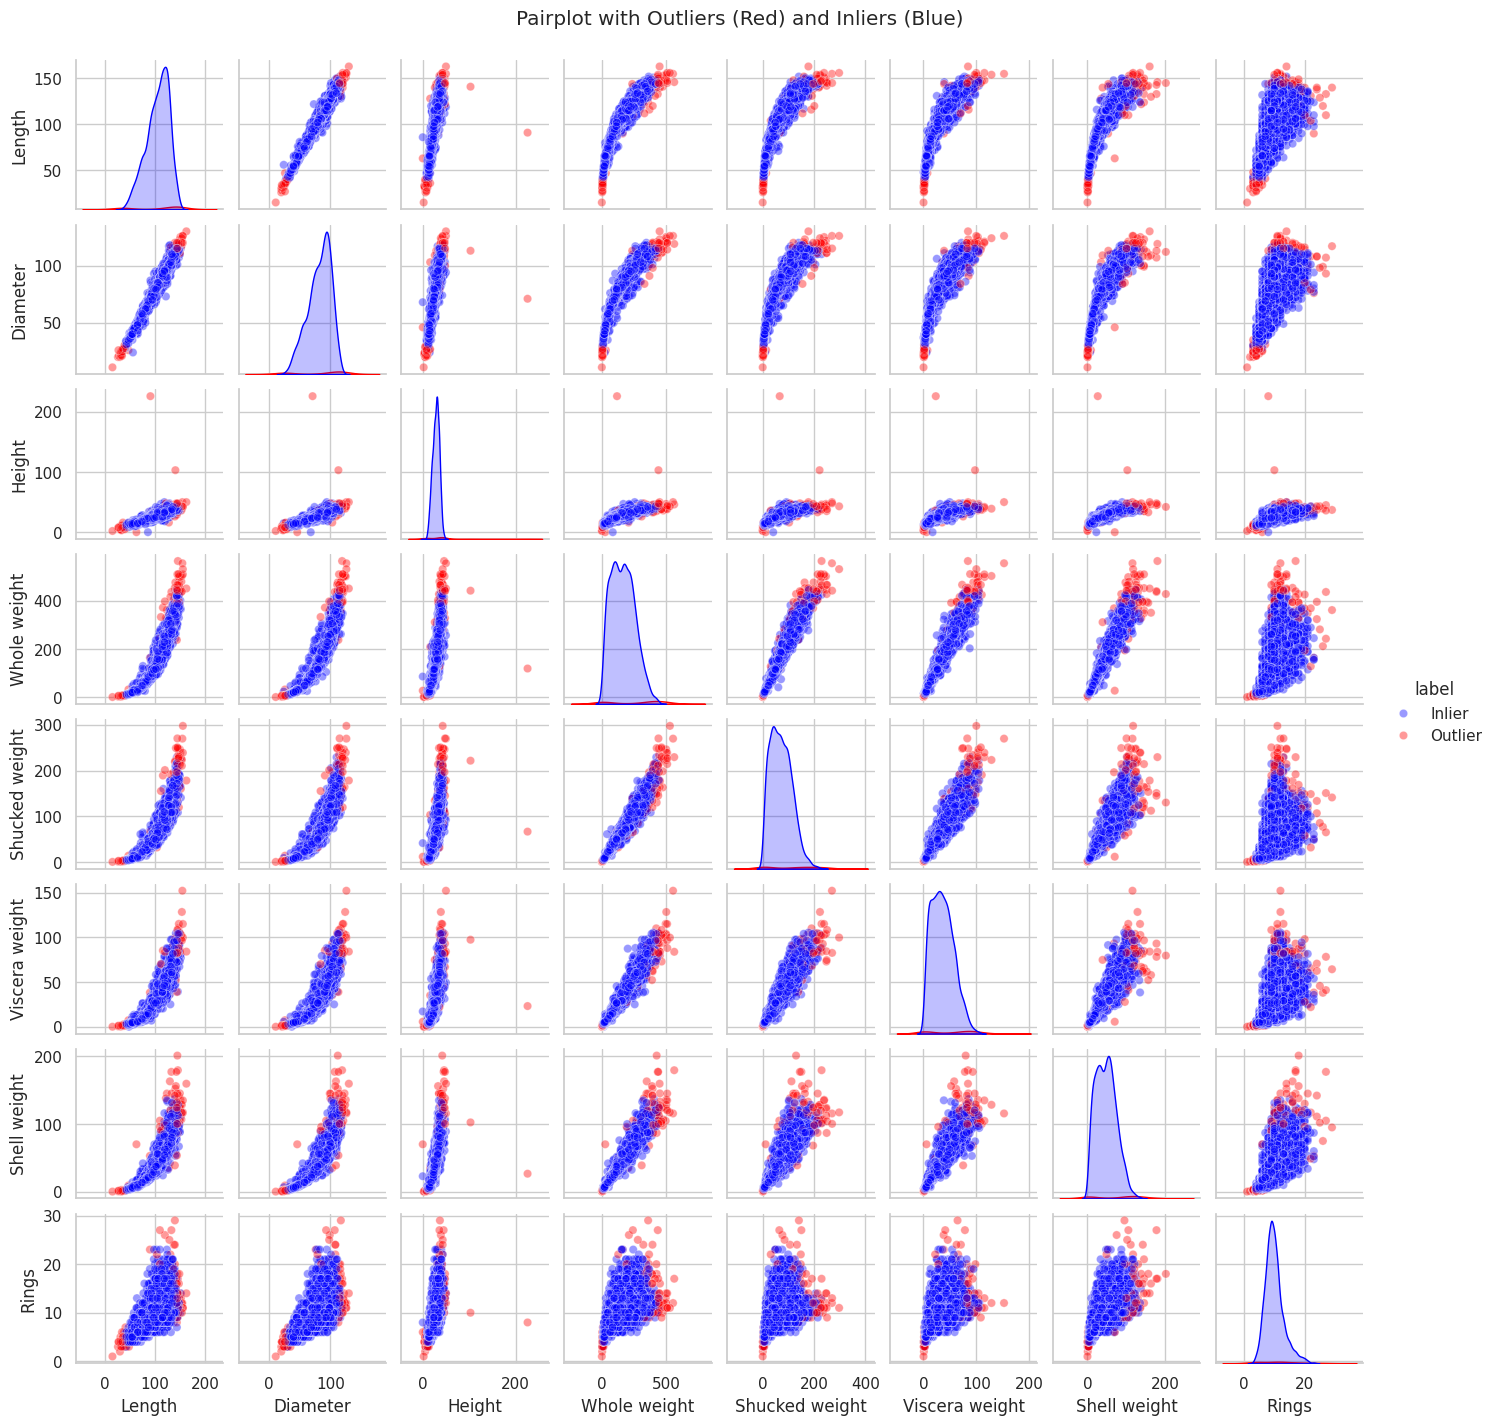

In [54]:
#Visualize results with pairplots
def visualize_outliers(df, columns):
    # Map 'anomaly' to descriptive labels for the legend
    df['label'] = df['anomaly'].map({'inlier': 'Inlier', 'outlier': 'Outlier'})

    sns.pairplot(
        df,
        vars=columns,
        hue='label',  # Use the new label column for the legend
        palette={'Inlier': 'blue', 'Outlier': 'red'},  # Set colors for labels
        plot_kws={'alpha': 0.4},
        height=1.75
    )
    plt.suptitle("Pairplot with Outliers (Red) and Inliers (Blue)", y=1.02)
    plt.show()


visualize_outliers(train_data_original, train_data_original.select_dtypes(include='number'))


In [55]:
# Step 7: Remove outliers from the training set
cleaned_train_data = train_data_original[train_data_original['anomaly'] == 'inlier'].drop(columns=['anomaly', 'label'])

# Display results
print(f"Original train dataset size: {train_data.shape[0]}")
print(f"Cleaned train dataset size: {cleaned_train_data.shape[0]}")

Original train dataset size: 3341
Cleaned train dataset size: 3240


In [64]:
# del all rows with height = 0

cleaned_train_data = cleaned_train_data[cleaned_train_data['Height'] != 0]

In [66]:
X_train_clean = cleaned_train_data.copy()

# Exploratory Data Analysis

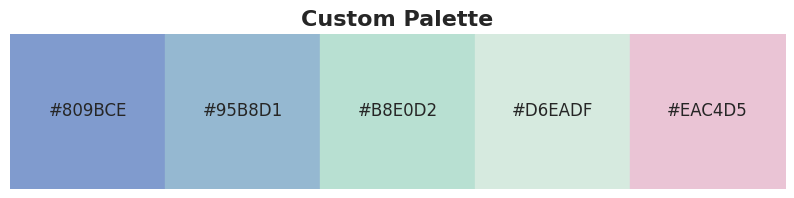

In [57]:
# Colors pallette
custom_palette = ['#809BCE', '#95B8D1', '#B8E0D2', '#D6EADF', '#EAC4D5']

# Ustawienie palety w Seaborn
sns.set_palette(custom_palette)

# Ustawienie stylu
sns.set_theme(style="whitegrid")

# Wyświetlenie palety kolorów
def display_palette(palette):
    plt.figure(figsize=(10, 2))
    for i, color in enumerate(palette):
        plt.fill_between([i, i + 1], 0, 1, color=color)
        plt.text(i + 0.5, 0.5, color, ha='center', va='center', fontsize=12)
    plt.xlim(0, len(palette))
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title("Custom Palette", fontsize=16, fontweight="bold")
    plt.show()

# Wyświetlenie palety
display_palette(custom_palette)

In [67]:
# set EDA set

eda = X_train_clean.copy()

## Histograms

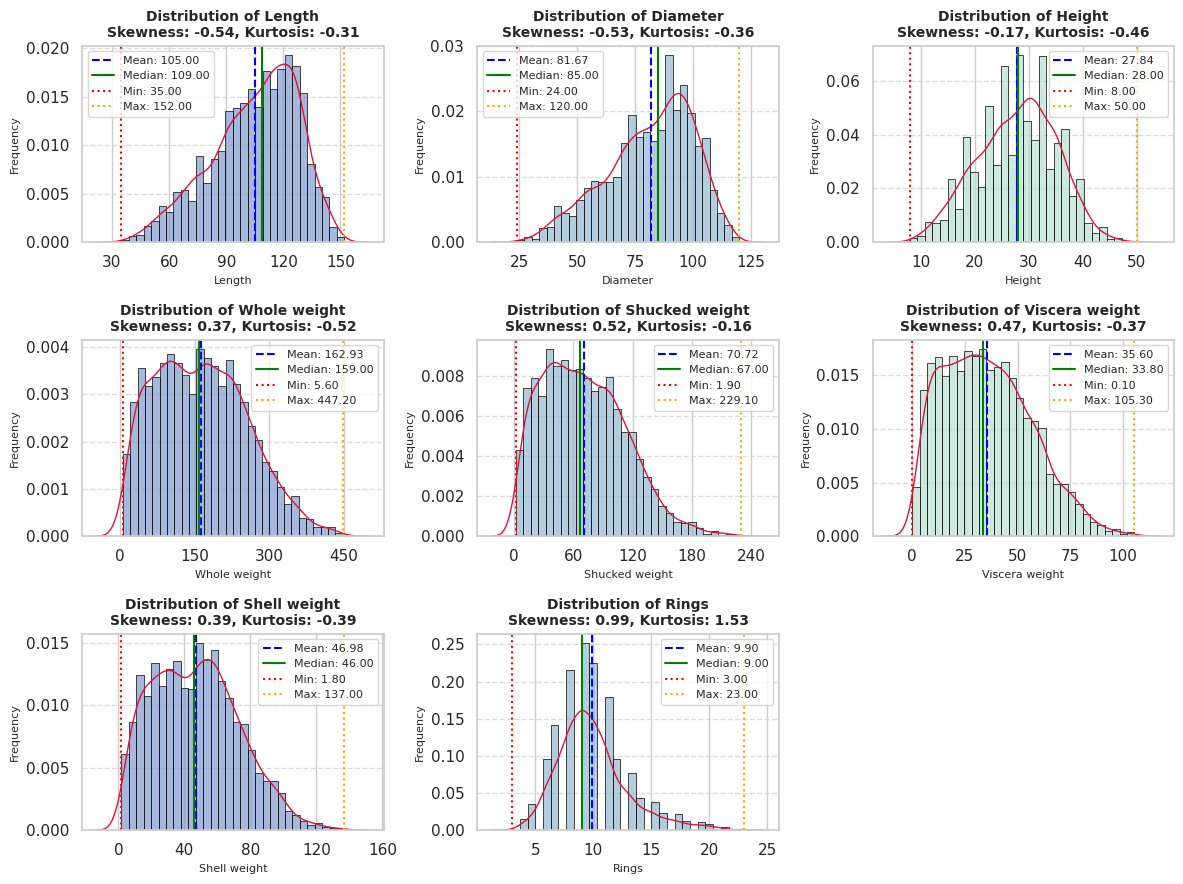

In [68]:
numeric_columns = eda.select_dtypes(include='number').columns.to_list()

num_cols = len(numeric_columns)
n_cols = 3
fig, axes = plt.subplots(nrows = (num_cols + 2) // n_cols, ncols=n_cols, figsize = (12, 3*((num_cols + 2) // n_cols)))

for i, col in enumerate(numeric_columns):
    ax = axes.flat[i]

    # Plot histogram with KDE
    sns.histplot(eda[col], kde=False, bins=30, color=custom_palette[i % len(custom_palette[0:n_cols])], alpha=0.7, ax=ax, edgecolor='black', linewidth=0.5,stat="density")
    sns.kdeplot(eda[col], color='crimson', ax=ax, linewidth=1)

    # Calculate statistics
    mean = eda[col].mean()
    median = eda[col].median()
    skewness = eda[col].skew()
    kurtosis = eda[col].kurt()
    min_val = eda[col].min()
    max_val = eda[col].max()

    # Add vertical lines for mean, median, min, and max
    ax.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    ax.axvline(min_val, color='red', linestyle=':', label=f'Min: {min_val:.2f}')
    ax.axvline(max_val, color='orange', linestyle=':', label=f'Max: {max_val:.2f}')

    # Add title and labels
    ax.set_title(f"Distribution of {col}\nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}", fontsize=10, fontweight='bold')
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Configure x-axis ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

    # Add legend
    ax.legend(fontsize=8, loc='best')

for j in range(i +1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

## Description of histograms:

# Descriptive Analysis of Histogram Transformations

## 1. Length
- **Distribution Statistics**:
  - Skewness: `-0.54`, Kurtosis: `-0.31`
- **Visual Analysis**:
  - The histogram is nearly symmetric with a slight left skew.
- **Recommended Transformation**:
  - **None**. The data is already close to normal.
- **Preprocessing**:
  - Apply **scaling** (e.g., StandardScaler).

---

## 2. Diameter
- **Distribution Statistics**:
  - Skewness: `-0.53`, Kurtosis: `-0.36`
- **Visual Analysis**:
  - The histogram is nearly symmetric with minor left skewness.
- **Recommended Transformation**:
  - **None**. The data is already close to normal.
- **Preprocessing**:
  - Apply **scaling** (e.g., StandardScaler).

---

## 3. Height
- **Distribution Statistics**:
  - Skewness: `-0.17`, Kurtosis: `-0.46`
- **Visual Analysis**:
  - The histogram is close to symmetric with no significant skewness or tail.
- **Recommended Transformation**:
  - **None**. The data is already symmetric.
- **Preprocessing**:
  - Apply **scaling** (e.g., MinMaxScaler or StandardScaler).

---

## 4. Whole weight
- **Distribution Statistics**:
  - Skewness: `0.37`, Kurtosis: `-0.52`
- **Visual Analysis**:
  - The histogram shows a slight right skew. Square root transformation provides better normalization than logarithmic transformation.
- **Recommended Transformation**:
  - **Square Root Transformation** to reduce skewness without over-compressing the range.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 5. Shucked weight
- **Distribution Statistics**:
  - Skewness: `0.52`, Kurtosis: `-0.16`
- **Visual Analysis**:
  - The histogram shows minor right skewness. The square root transformation preserves variability better than logarithmic transformation.
- **Recommended Transformation**:
  - **Square Root Transformation** for minor skew correction.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 6. Viscera weight
- **Distribution Statistics**:
  - Skewness: `0.47`, Kurtosis: `-0.37`
- **Visual Analysis**:
  - The histogram shows slight right skewness. Both square root and logarithmic transformations reduce skewness effectively, but square root preserves the natural variability better.
- **Recommended Transformation**:
  - **Square Root Transformation** for normalization.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 7. Shell weight
- **Distribution Statistics**:
  - Skewness: `0.39`, Kurtosis: `-0.39`
- **Visual Analysis**:
  - The histogram shows slight right skewness. Square root transformation normalizes the data well.
- **Recommended Transformation**:
  - **Square Root Transformation** to reduce skewness while maintaining variability.
- **Preprocessing**:
  - After the square root transformation, apply **scaling** (e.g., StandardScaler).

---

## 8. Rings
- **Distribution Statistics**:
  - Skewness: `0.99`, Kurtosis: `1.53`
- **Visual Analysis**:
  - The histogram shows significant right skewness. Logarithmic transformation handles the long tail more effectively than square root transformation.
- **Recommended Transformation**:
  - **Logarithmic Transformation** to handle the severe skewness.
- **Preprocessing**:
  - After the logarithmic transformation, apply **scaling** (e.g., StandardScaler).

---

## Summary of Recommended Transformations

| Feature            | Skewness | Transformation          | Preprocessing                 |
|---------------------|----------|-------------------------|-------------------------------|
| **Length**          | -0.54    | None                    | Scaling (StandardScaler)      |
| **Diameter**        | -0.53    | None                    | Scaling (StandardScaler)      |
| **Height**          | -0.17    | None                    | Scaling (MinMaxScaler)        |
| **Whole weight**    | 0.37     | Square root             | Scaling (StandardScaler)      |
| **Shucked weight**  | 0.52     | Square root             | Scaling (StandardScaler)      |
| **Viscera weight**  | 0.47     | Square root             | Scaling (StandardScaler)      |
| **Shell weight**    | 0.39     | Square root             | Scaling (StandardScaler)      |
| **Rings**           | 0.99     | Logarithmic             | Scaling (StandardScaler)      |

---

## Why Square Root Over Logarithmic Transformation for Some Features?
1. **Square Root Benefits**:
   - Compresses high values less aggressively than logarithmic transformation, preserving variability.
   - Ideal for features with mild to moderate skewness.

2. **Logarithmic Transformation Limitations**:
   - Over-compression can result in loss of meaningful variability, especially for distributions with minor skewness.

3. **Visual Inspection**:
   - Always plot transformed histograms to evaluate the result.


<Axes: xlabel='Length', ylabel='Count'>

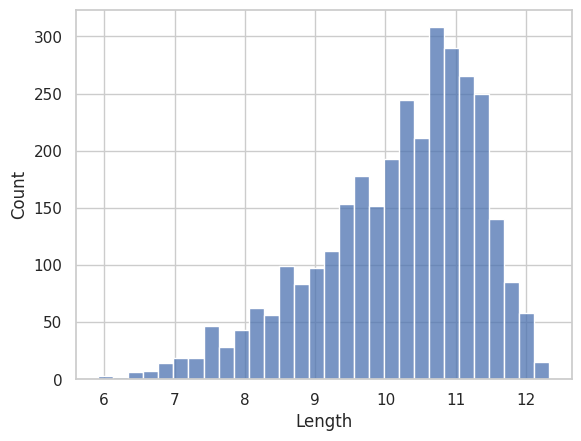

In [86]:
sns.histplot(np.sqrt(eda['Length']))

<Axes: xlabel='Length', ylabel='Count'>

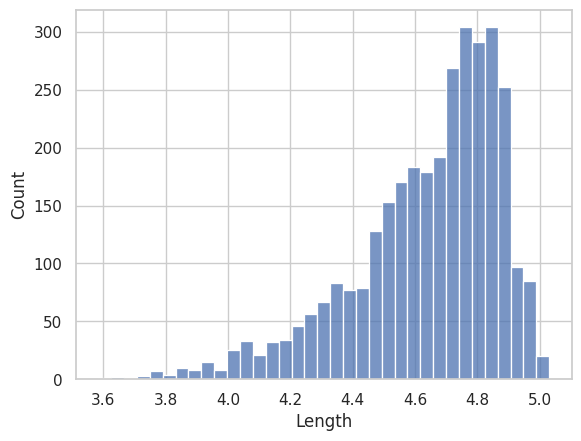

In [87]:
sns.histplot(np.log1p(eda['Length']))